# Assignment 2: Voting Visualized

## Deadline

TBD

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [2]:
%pylab inline
import folium
import json
import os
import pandas as pd
import seaborn as sns
import re as re
#pd.set_option('mode.chained_assignment', None)
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_folder = './data/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

In [3]:
# Task A
# Create Swiss map with the cantons delimitations
Swiss_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)
folium.TopoJson(json.load(open(r'data/ch-cantons.topojson.json')), 'objects.cantons', smooth_factor=0.001).add_to(Swiss_map)
Swiss_map.save('Swiss_map_cantons.html')
Swiss_map

# TODO : How to see in a better way the national delimitation

In [4]:
Swiss_pop = pd.read_excel(data_folder + 'communes_pop.xls', sheet_name = '2017',
                               header = 3, skiprows = [4, 5], skipfooter = 7).reset_index()
Swiss_pop = Swiss_pop.rename(columns = {'Etat de la' : 'Etat_janvier', 'Arrivées 1)': 'Arrivees',
                                 'Etat de la.1' : 'Etat_decembre', 'en nombres' : 'Variation_nombre',
                                'en %': 'Variation_%','Décès' : 'Deces', 'Départs' : 'Departs', 'index' : 'Nom'})

# Identification of the communes
index = Swiss_pop.Nom.apply(lambda Name: Name.startswith('......'))
Swiss_pop.loc[index, 'Nom'] = Swiss_pop[index]['Nom'].apply(lambda Name : Name[6:])
Swiss_commune = Swiss_pop.loc[index, :]

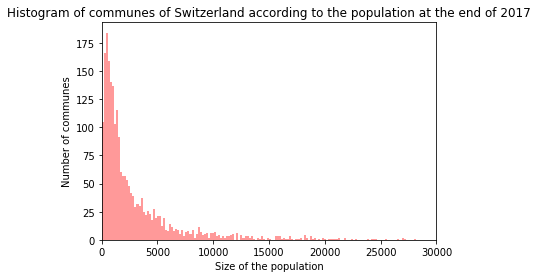

In [5]:
#Task B
sns.distplot(Swiss_commune.Etat_decembre.values, kde = False, bins = len(Swiss_commune), color = 'red');
xlim(0, 30000);
title('Histogram of communes of Switzerland according to the population at the end of 2017');
xlabel('Size of the population');
ylabel('Number of communes');

#### Task B :

[...]

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

In [4]:

# Translate the french name of the cantons to their id, as it is in the json files
cantons_ids = {
    'Zurich' : 'ZH',
    'Berne' : 'BE',
    'Lucerne' : 'LU',
    'Obwald' : 'OW',
    'Nidwald' : 'NW',
    'Uri' : 'UR',
    'Schwytz' : 'SZ',
    'Schaffhouse' : 'SH',
    'Tessin' : 'TI',
    'Valais' : 'VS',
    'Fribourg' : 'FR',
    'Neuchâtel' : 'NE',
    'Jura' : 'JU',
    'Vaud' : 'VD',
    'Genève' : 'GE',
    'Grisons' : 'GR',
    'Soleure' : 'SO',
    'Bâle-Ville' : 'BS',
    'Bâle-Campagne' : 'BL',
    'St. Gall' : 'SG',
    'Saint-Gall' : 'SG',
    'Glaris' : 'GL',
    'Zoug' : 'ZG',
    'Appenzell Rh. Ext.' : 'AG',
    'Appenzell Rh.-Ext.' : 'AG',
    'Appenzell Rh. Int.' : 'AI',
    'Appenzell Rh.-Int.' : 'AI',
    'Argovie' : 'AR',
    'Thurgovie' : 'TG'
}


def customrename(df):
    '''Remove notes as 3) in column or index names'''
    
    # Rename columns
    idx_col = df.columns.str.contains('\d', regex=True)

    while any(idx_col):
        for col in df.columns[idx_col]:
            df.rename(columns={col : str.strip(col[:-1])}, inplace=True)
        idx_col = df.columns.str.contains('\d', regex=True)
        
    # Rename indexes    
    idx_row = df.index.str.contains('\d', regex=True)

    while any(idx_row):
        for row in df.index[idx_row]:
            df.rename(index={row : str.strip(row[:-1])}, inplace=True)
        idx_row = df.index.str.contains('\d', regex=True)
    
    df.rename(index = lambda x: str.strip(x), inplace=True)
    
    df.rename(index=cantons_ids, inplace=True)
    
    
    


In [5]:
# Import data constant

geo_json_data = json.load(open(r'data/ch-cantons.topojson.json'))

In [6]:
# Cleaning of the data 

df_voters =  pd.read_excel(data_folder + 'voters.xls', header=3, usecols='A,C:BL', skiprows=[4,5], skipfooter=(90-35)).reset_index()

# Drop hidden columns and rows of the excel file
df_voters.dropna(axis=0, subset=['index'], inplace=True)
df_voters.dropna(axis=1, how='all', inplace=True)

df_voters.set_index('index', inplace=True)

# Rename columns and indexes using custom function
customrename(df_voters)

df_voters.head()

,Année électorale,Participation,PLR,PDC,PS,UDC,PLS,PEV,PCS,PVL,...,PSA,PES,AVF,Sol.,DS,UDF,Lega,MCR,Autres,Total
index,,,,,,,,,,,,,,,,,,,,,
ZH,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,NaN,4.271767,NaN,7.637858,...,NaN,7.218776,2.977664,NaN,NaN,2.662277,NaN,NaN,0.669707,100
BE,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,NaN,6.172897,NaN,6.914731,...,0.681873,10.104467,0.495841,NaN,0.179432,3.710624,NaN,NaN,0.912781,100
LU,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,NaN,0.199143,NaN,4.320211,...,NaN,6.700011,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,100
UR,2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,NaN,NaN,NaN,NaN,...,NaN,2.378061,NaN,NaN,NaN,NaN,NaN,NaN,2.428270,100
SZ,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,NaN,0.304428,NaN,2.544623,...,NaN,0.800215,NaN,NaN,NaN,NaN,NaN,NaN,1.513578,100


#### Task A

First, we extract in a new data set only the column UDC. According to the notes in the excel document, AI and GR do not have a value because of
their electoral system which is in conflict with the computation method used the Federal Statistical Office. We can consider two solutions : either 
keep the Nan and indicate missing data on the map, either find other meaningful values. We choose the second option and we find in this 
<a href="https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217202.html">document</a>
values for the Federal Assembly. We can use this value as an approximation of the percentage of UDC voters in AI and GR, considering we ignore
the fact that political voting systems and strategies differ between the national and state scale. 

In [69]:
# Task A

df_udc_voter_per = df_voters[['UDC']]

# We set Nan values to 0 in order to plot them blank, a convention for Nan on maps
df_udc_voter_per.loc['AI', 'UDC'] = 0
df_udc_voter_per.loc['GR', 'UDC'] = 0

df_udc_voter_per.reset_index(inplace=True)

# Map
UDC_map_per = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)


UDC_map_per.choropleth(geo_data=geo_json_data, 
                       data=df_udc_voter_per,
                       columns=['index', 'UDC'],
                       key_on='feature.id',
                       topojson = 'objects.cantons',
                       fill_color='BuGn', fill_opacity=0.7, line_opacity=0.5,
                       threshold_scale = [0, 4, 14, 21, 28, 35], # Custom scale to deal with Nan values
                       legend_name='Percentage of UDC voters (%)')

UDC_map_per.save('UDC_map_per.html')

UDC_map_per

In [8]:
# Cleaning of the data

df_population =  pd.read_excel(data_folder + 'national_council_elections.xlsx', header=4, skiprows=[5, 6, 8], skipfooter=(44-34))

# Rename column and index labels
customrename(df_population)

df_population.h

,Electeurs inscrits,Electeurs,Participation en %
Total,5283556,2563052,48.509981
ZH,907623,428837,47.248362
BE,729203,357770,49.063155
LU,271143,138096,50.931059
UR,26414,15091,57.132581


In [36]:
df_population.describe()

,Electeurs inscrits,Electeurs,Participation en %
count,2.700000e+01,2.700000e+01,27.000000
mean,3.913745e+05,1.898557e+05,49.779808
std,1.000498e+06,4.848625e+05,6.286864
min,1.156500e+04,4.247000e+03,36.722871
25%,5.148600e+04,3.007700e+04,46.543519
50%,1.677200e+05,7.819200e+04,48.509981
75%,2.600290e+05,1.335995e+05,54.004938
max,5.283556e+06,2.563052e+06,62.640097


In [86]:
# Task B

# We do not need the total percentage
df_population_noTotal = df_population.drop('Total')

df_UDC_population = pd.merge(df_population_noTotal, df_udc_voter_per, left_index = True, right_on = 'index')

# Computation of the percentage of voters
df_UDC_population['Voters'] = round(df_UDC_population.Electeurs * df_UDC_population.UDC / 100, 0)

df_UDC_population.set_index('index', inplace=True)
df_UDC_population.loc['AI','Voters'] = 1
df_UDC_population.loc['GR','Voters'] = 1
df_UDC_population.reset_index(inplace=True)


df_UDC_population.drop(columns=['Electeurs inscrits', 'Participation en %', 'Electeurs', 'UDC'], inplace=True)

df_UDC_population.head()

,index,Voters
0,ZH,128751.0
1,BE,95742.0
2,LU,33303.0
3,UR,3630.0
4,SZ,18166.0


In [73]:
df_UDC_population.describe()

,Voters
count,26.000000
mean,22578.846154
std,30683.986841
min,1.000000
25%,4037.500000
50%,10356.000000
75%,24971.250000
max,128751.000000


In [85]:
UDC_pop_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)

thresh = np.linspace(1000,df_UDC_population.Voters.max(),5)
thresh = np.insert(thresh,0,0)

UDC_pop_map.choropleth(geo_data=geo_json_data, 
                       data=df_UDC_population,
                       columns=['index', 'Voters'],
                       key_on='feature.id',
                       topojson = 'objects.cantons',
                       fill_color='BuGn', fill_opacity=0.7, line_opacity=0.5,
                       threshold_scale = thresh, # Custom scale to deal with Nan values
                       legend_name='Percentage of UDC residents (%)')

UDC_pop_map.save('UDC_pop_map.html')

UDC_pop_map

#### Task C

For a national election, considering majority voting, the second visualization is more informative, because it will reflect the number of people
ready to vote UDC. It shows how some cantons, as Zurich, have both a big population and a big proportion of UDC voters.

For a cantonal election, the first visalization is more informative as it represents, for each state independently, the proportion of the population ready to vote UDC.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

### Task A

In [111]:
# Explicit cantons ids
cantons_ids = {
    'ZH':'Zurich',
    'BE':'Berne',
    'LU':'Lucerne',
    'OW':'Obwald',
    'NW':'Nidwald',
    'UR':'Uri',
    'SZ':'Schwytz',
    'SH':'Schaffhouse',
    'TI':'Tessin',
    'VS':'Valais',
    'FR':'Fribourg',
    'NE':'Neuchâtel',
    'JU':'Jura',
    'VD':'Vaud',
    'GE':'Genève',
    'GR':'Grisons',
    'SO':'Soleure',
    'BS':'Bâle-Ville',
    'BL':'Bâle-Campagne',
    'SG':'St. Gall',
    'GL':'Glaris',
    'ZG':'Zoug',
    'AG':'Appenzell Rh. Ext.',
    'AI':'Appenzell Rh. Int.',
    'AR':'Argovie',
    'TG':'Thurgovie'
}

col_names = {'index' : 'Canton', 'Année électorale 2)': 'Year','Année électorale': 'Year'}

In [7]:
# Functions
# df.loc[:,('one','second')]

def clear_notes(df):
    '''Clear notes in canton column (e.g '2)')'''
    for row_index, row in df.iterrows():
        #print(row['Canton'])
        if re.search("[0-9]",row['Canton']) != None:
            df['Canton'].iloc[row_index] = (re.search(r"[A-zÀ-ÿ\s\-\.]*(?=\s[0-9])", row['Canton']))[0]
        if str(df['Canton'].iloc[row_index][-1]) == ' ':
            df['Canton'].iloc[row_index] = str(row['Canton'])[:-1]

def compute_right_lean(df):
    '''Compute right lean coefficient'''
    df['RightLean'] = (df.UDC - df.PS)/(df.UDC + df.PS)
    
def right_lean_colors(cantonID,df):
    """Maps Right lean to blue and Left lean to red."""
    canton_name = cantons_ids[cantonID]
    right_lean = df.loc[df.Canton == canton_name,'RightLean'].values > 0
    left_lean = df.loc[df.Canton == canton_name,'RightLean'].values < 0
    if right_lean:
        return '#0000ff'
    elif left_lean:
        return '#ff0000'
    else:
        return '#ffffff'

In [8]:
# Pull data from excel file
df_vote_shares_14_18 = pd.read_excel(data_folder + 'voters.xls',
                                     sheet_name = 'actuel (2014-2018)',
                                     header = 3,
                                     skiprows = [4,5,11,17,23,29],
                                     skipfooter = 55,
                                     usecols = [0,2,8,10]).reset_index()

df_vote_shares_14_18 = df_vote_shares_14_18.rename(columns = col_names)

# Clearing data
clear_notes(df_vote_shares_14_18) 

df_vote_shares_14_18.head(26)

TypeError: '_sre.SRE_Match' object is not subscriptable

In [9]:
# Compute right lean coefficient
compute_right_lean(df_vote_shares_14_18)

# Create Swiss map with the cantons delimitations
results_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)
folium.TopoJson(
    json.load(open(r'data/ch-cantons.topojson.json')),
    'objects.cantons',
    smooth_factor=0.001,
    style_function=lambda feature: {
        'fillColor': right_lean_colors(feature['id'],df_vote_shares_14_18),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(results_map)

results_map


### Task B 

In [10]:
# Pull data from excel file
df_vote_shares_10_13 = pd.read_excel(data_folder + 'voters.xls',
                                     sheet_name = '2010-2013',
                                     header = 3,
                                     skiprows = [4,5,11,17,23,29],
                                     skipfooter = 50,
                                     usecols = [0,2,8,10]).reset_index()

df_vote_shares_10_13 = df_vote_shares_10_13.rename(columns = col_names)

# Clearing data
clear_notes(df_vote_shares_10_13)   

# Compute right lean coefficient
compute_right_lean(df_vote_shares_10_13) 

# Merge dataframes
df_vote_shares_10_18 = pd.merge(df_vote_shares_10_13,df_vote_shares_14_18,on='Canton')


TypeError: '_sre.SRE_Match' object is not subscriptable